In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import re
from nltk.tokenize  import word_tokenize
import numpy as np
from scipy import spatial
import gensim.downloader as api

pd.set_option('display.max_colwidth', None)  # Show all text in each cell without truncation


In [530]:
model_glove=api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [96]:
nlp=spacy.load('en_core_web_sm')#using the md model because it has word embeddings

In [45]:
Df_Train=pd.read_csv('Df_TrainLong.csv',index_col=0)


In [53]:
Df_Train['question']=Df_Train['question'].apply(lambda x: x.lower() if isinstance(x,str) else x)
Df_Train

,question,label
0,then why separate bi platforms?,DIRECT
1,for what books and courses or whatever?,DIRECT
2,how do you use gpu using gensim? could you elaborate?,DIRECT
3,would any expert in user experience ux be willing to lend their expertise?,PERMISSION
4,where can i ask questions related to r?,PERMISSION
...,...,...
97,what was the name of the cook on rawhide,DIRECT
97,what county is chicago in,DIRECT
97,what is the wingspan of a condor,DIRECT
97,what facial feature typically contains about 55 hairs,DIRECT


In [55]:
# label comparison to prevent bias
print('direct-->',len(Df_Train[Df_Train['label']=='DIRECT']),' Permission-->',len(Df_Train[Df_Train['label']=='PERMISSION']))

direct--> 2892  Permission--> 2360


In [56]:
Df_Train[Df_Train['label']=='DIRECT'].sample(10)

,question,label
2183,hey everyone i m a backed engineer dabbling with bigdata as a personal interest i have implemented a java based mapreduce application for one our project requirement what this does is read data from a hive table process it and write to a hive table we are using aws emr as our datalake solution and i m going to create a new emr run this app against our old data my question is is it possible someone with better knowledge about aws instance types and let me know what instance types should i choose for my master core and task nodes for my new emr? because our current production emr use m xlarge instances for each node types master core and task and based on my little research i think that s not the best choose for datalake tasks tia,DIRECT
97,what product does mrs olsen promote,DIRECT
0,then why separate bi platforms?,DIRECT
3731,have any of you worked in ocean chemistry or ocean climate related fields? i have been working on some datasets and i am struggling with some new terms and to analyse the whole situation i got to understand them can anyone please help to understand or show some links or resources on those keywords? thank you,DIRECT
583,if doing it like you describe is the common best way to do it then i ll do it like that it just sounded like a hacky solution to me to append your other features like that but to be fair i ve no idea how things work under the hood,DIRECT
97,what is the nature of learning,DIRECT
2633,i want to use it in regression it is best? necessary? to do a log transformation first to get it into a gaussian form depends you can do other transformation like scaling and log but if your data is skewed already how good can it be? what is your objective? to get a better accuracy score? or do a hypothesis test? why not try both side by side to determine the difference? i personally have seen log transformation do very well for clustering for linear models could very well do the same but it depends on what your y is,DIRECT
648,i read heard somewhere that most of the time as a ds you ll be doing mainly data cleaning preprocessing how accurate is that?,DIRECT
1451,i have a pandas df that contains a lot of data but has different ids i would like to parse only the last row of every id and it would be even better if i could target specific column from the last row directly but that may be an overkill i ve tried this but it doesn t work any ideas? for i in range 0 h df userid i iloc 1 i just get keyerror false,DIRECT
2105,hey folks do you think it would be a good idea if we would have a bi monthly presentation by members of this discord to share what they have been doing in the data science space?,DIRECT


In [57]:
#comparing token counts for each label
Df_Train['wordCount']=Df_Train.apply(lambda x: len(x['question'].split()),axis=1)
Df_Train

,question,label,wordCount
0,then why separate bi platforms?,DIRECT,5
1,for what books and courses or whatever?,DIRECT,7
2,how do you use gpu using gensim? could you elaborate?,DIRECT,10
3,would any expert in user experience ux be willing to lend their expertise?,PERMISSION,13
4,where can i ask questions related to r?,PERMISSION,8
...,...,...,...
97,what was the name of the cook on rawhide,DIRECT,9
97,what county is chicago in,DIRECT,5
97,what is the wingspan of a condor,DIRECT,7
97,what facial feature typically contains about 55 hairs,DIRECT,8


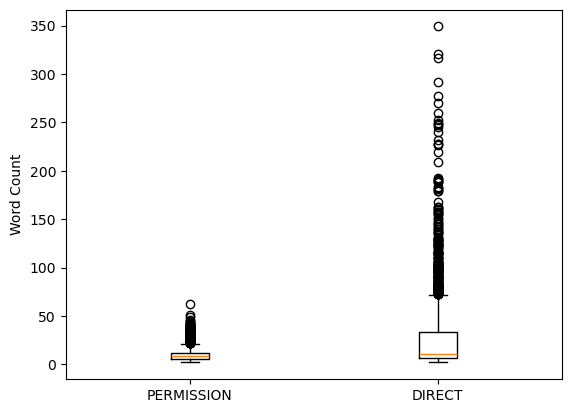

In [58]:
#boxplot to remove long->direct bias
plt.boxplot([Df_Train[Df_Train['label']=='PERMISSION']['wordCount'],Df_Train[Df_Train['label']=='DIRECT']['wordCount']],labels=['PERMISSION','DIRECT'])
plt.ylabel('Word Count')
plt.show()

In [59]:
#truncating outliers:
Df_Train = Df_Train.drop(Df_Train[(Df_Train['wordCount'] >= 62)&(Df_Train['label']=='DIRECT')].index)

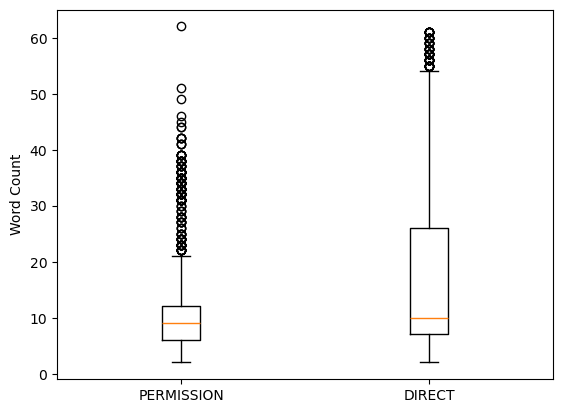

In [60]:
#boxplot after truncation
plt.boxplot([Df_Train[Df_Train['label']=='PERMISSION']['wordCount'],Df_Train[Df_Train['label']=='DIRECT']['wordCount']],labels=['PERMISSION','DIRECT'])
plt.ylabel('Word Count')
plt.show()

In [61]:
#label comparison after truncation:
print('direct-->',len(Df_Train[Df_Train['label']=='DIRECT']),' Permission-->',len(Df_Train[Df_Train['label']=='PERMISSION']))

direct--> 2617  Permission--> 2360


In [62]:
Df_Train.to_csv('DfTrain_v2.csv')

In [231]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec

import gensim
 

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [307]:
from sklearn.ensemble import RandomForestClassifier


In [65]:
# Permission 1 --  direct 0 :

Df_Train['label']=np.where(Df_Train['label']=='PERMISSION',1,0)

,question,label,wordCount
3,would any expert in user experience ux be willing to lend their expertise?,1,13
4,where can i ask questions related to r?,1,8
7,any compliance pros around?,1,4
8,anyone experienced with incident response and management?,1,7
9,can i ask a question about doing exercises?,1,8
...,...,...,...
4514,hello friend i m a music aficionado exploring classical music i m listening to orchestral pieces and i have a question about musical notation can i seek assistance from the community?,1,31
4515,hey ther i m a diy crafter making handmade gifts for friends i m crafting personalized cards and i have a question about calligraphy techniques would anyone be able to provide some guidance?,1,33
4516,greetings folk i m an animal lover volunteering at a shelter i m socializing with rescue dogs and i have a question about dog behavior can i seek assistance from the community?,1,32
4517,hello al i m a gardening enthusiast planting a vegetable garden i m choosing seeds and i have a question about companion planting is it okay if i ask for help here?,1,32


## Word Embedding using Word2Vec

In [ ]:
Df_shuffled=Df_Train.sample(frac=1)
Df_shuffled=Df_shuffled.reset_index(drop=True)
Df_shuffled

In [388]:
DF_embedd=Df_shuffled['question'].copy()

In [389]:
DF_embedd

0                                                                                                                         why do you need all the time sota ?
1                                                                                                what is the abbreviation of the company name general motors 
2                                                                                                                                   why not take a bachelors?
3           is it better to view test data and figure out a pattern so that we can train the model accordingly? also should i worry about data snooping bias?
4                                                                                                                             who know how to code in python?
                                                                                ...                                                                          
4977    how relevant is that stuff to what you want 

In [390]:
from gensim.utils import simple_preprocess
textrev=DF_embedd.apply(simple_preprocess)
# Tokenize the text data into words


In [410]:
%%time
#model initialisation
model=gensim.models.Word2Vec(vector_size=300,
              window=3,
              min_count=2,
              workers=4,
              sg=0
                             
              )




model.build_vocab(textrev)
model.train(textrev,
            total_examples=model.corpus_count,
            epochs=model.epochs)





CPU times: user 1.18 s, sys: 19.8 ms, total: 1.2 s
Wall time: 610 ms


(217377, 321465)

In [519]:
model.wv.most_similar('anyone')

[('assist', 0.9987198114395142),
 ('familiar', 0.9984508156776428),
 ('who', 0.9984242916107178),
 ('could', 0.9982808828353882),
 ('css', 0.9981539845466614),
 ('proficient', 0.9980864524841309),
 ('in', 0.9980760216712952),
 ('knows', 0.9980208277702332),
 ('html', 0.9980124831199646),
 ('risk', 0.9979928135871887)]

In [532]:
model_glove.most_similar('anyone')

[('unless', 0.959563672542572),
 ('anything', 0.9578254818916321),
 ('if', 0.9572886824607849),
 ('else', 0.9554340243339539),
 ('anybody', 0.9532617330551147),
 ('either', 0.9479489922523499),
 ('there', 0.9472057819366455),
 ('when', 0.9461482763290405),
 ('need', 0.9445397257804871),
 ('find', 0.9440227150917053)]

In [524]:

def pad_or_truncate_list(lst, target_length):
  
   # Pad or truncate a list to the specified target length.
 
    if len(lst) < target_length:
        # Pad the list with zeros
        lst += [0.0] * (target_length - len(lst))
    elif len(lst) > target_length:
        # Truncate the list to the target length
        lst = lst[:target_length]
    return lst

# Define the maximum length of the lists
max_length = 20

# Split the input strings into lists of words
list1 = str.split('how')
#list2 = str.split('where can i ask questions related to r?')
list2 = str.split('anyone')

# Pad or truncate the lists to the maximum length
list1 = pad_or_truncate_list(list1, max_length)
list2 = pad_or_truncate_list(list2, max_length)

finlist=list1+list2
print(finlist)
#model.wv.get_mean_vector(list1,list2)
model.wv.get_mean_vector(finlist)

['how', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'anyone', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


array([ 0.01207057,  0.07150717,  0.0046545 ,  0.01424412, -0.01880872,
       -0.10554507,  0.05330317,  0.16571358,  0.02305815, -0.04155353,
       -0.00561472, -0.09153571,  0.00459182,  0.00520036, -0.05884845,
       -0.05794418,  0.07050189,  0.00393798,  0.03859274, -0.04614386,
       -0.04651482, -0.0271339 ,  0.05547633,  0.03010191,  0.06286279,
       -0.01167689, -0.11774923,  0.00900171, -0.056864  , -0.08877832,
        0.03232506, -0.04013234,  0.03974978,  0.01032521, -0.0169813 ,
        0.05510136,  0.03679106, -0.08278462, -0.00017213,  0.01135687,
       -0.04590449,  0.00547926, -0.00137719, -0.05100992,  0.04986475,
        0.07620259,  0.04548108,  0.0051021 ,  0.02441861,  0.06043297,
        0.02274686,  0.03085974, -0.02016582,  0.05516995, -0.00409883,
        0.06444235,  0.02365513,  0.02823985,  0.02361169,  0.00108981,
       -0.00364826, -0.02472164,  0.00445486,  0.04933156, -0.01555113,
        0.0190211 ,  0.02951199,  0.01285808, -0.04791927,  0.00

In [ ]:
for i, v in enumerate(X_train_vect):
    print(len(X_train.iloc[i]), len(v))

In [533]:
#func to get sentence vector:
def prep_and_vec(text):
    dok=nlp(text)#spacy doc object
    filtered_tokens=[]
    for token in dok:
        if token.is_punct:
            continue
        filtered_tokens.append(token.text)
    return model_glove.get_mean_vector(filtered_tokens)




In [522]:
#testing function:
prep_and_vec('anyone how')

array([ 0.01207057,  0.07150717,  0.0046545 ,  0.01424412, -0.01880872,
       -0.10554507,  0.05330317,  0.16571358,  0.02305815, -0.04155353,
       -0.00561472, -0.09153571,  0.00459182,  0.00520036, -0.05884845,
       -0.05794418,  0.07050189,  0.00393798,  0.03859274, -0.04614386,
       -0.04651482, -0.0271339 ,  0.05547633,  0.03010191,  0.06286279,
       -0.01167689, -0.11774923,  0.00900171, -0.056864  , -0.08877832,
        0.03232506, -0.04013234,  0.03974978,  0.01032521, -0.0169813 ,
        0.05510136,  0.03679106, -0.08278462, -0.00017213,  0.01135687,
       -0.04590449,  0.00547926, -0.00137719, -0.05100992,  0.04986475,
        0.07620259,  0.04548108,  0.0051021 ,  0.02441861,  0.06043297,
        0.02274686,  0.03085974, -0.02016582,  0.05516995, -0.00409883,
        0.06444235,  0.02365513,  0.02823985,  0.02361169,  0.00108981,
       -0.00364826, -0.02472164,  0.00445486,  0.04933156, -0.01555113,
        0.0190211 ,  0.02951199,  0.01285808, -0.04791927,  0.00

In [450]:
#averaging all the vectors in a sentence/question
index2word_set = set(model.wv.index_to_key) #index / lookup table in the embedding matrix 

def avg_feature_vector(sentence,  num_features, index2word_set):
    words = sentence.split()#words in sentence List()
    feature_vec = np.zeros((num_features, ), dtype='float32')#vec array empty to be filled later
    n_words = 0
    for word in words:#for word in sentence 0
        if word in index2word_set: #if word in vocab
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])#might change this to model.wv
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)#averaging over the total num of words in sentence
    return feature_vec #averaged vec final 

In [ ]:
model.wv['anyone']

In [455]:
s1_afv = avg_feature_vector('anyone here please',  num_features=300, index2word_set=index2word_set)
s2_afv = avg_feature_vector('html anyone here has a way of doing code wizard plz here', num_features=300, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)


0.9991134405136108


In [ ]:
!pip install POT

In [487]:

distance = model.wv.wmdistance(['anyone','here','a','wizard','in','python'],['how','can','i','do','how','can','i','do','this','html'])
distance

0.08907713759952651

In [460]:
distance

inf

In [534]:
%%time
#df adding new vec column
Df_shuffled['vec']=Df_shuffled['question'].apply(lambda x: prep_and_vec(x))

CPU times: user 59.5 s, sys: 1.09 s, total: 1min
Wall time: 1min 20s


In [536]:
Df_shuffled['vec'][0]


array([ 8.13543797e-03,  8.27216059e-02,  2.38701832e-02, -1.73362698e-02,
       -6.35207891e-02, -3.85480598e-02,  1.74370170e-01, -8.78597610e-04,
        1.23749413e-02, -3.00899819e-02, -1.21513933e-01, -3.34151369e-03,
       -7.84515083e-01, -2.61531472e-02, -1.11470893e-02, -1.71475094e-02,
       -7.13823829e-05, -6.53996840e-02, -3.50258127e-03, -2.52051875e-02,
        1.47307385e-02,  6.04266711e-02,  4.22514640e-02,  1.18523855e-02,
       -4.33676243e-02], dtype=float32)

In [537]:
#train test split

X_train, X_test, Y_train, Y_test = train_test_split(Df_shuffled.vec.values, 
                                                    Df_shuffled.label, 
                                                    test_size=0.3, 
                                                    random_state=42)


In [538]:
#Reshaping the xtrain/xtest
X_train_flat=np.stack(X_train)
X_test_flat=np.stack(X_test)

In [539]:
Y_train

4346    0
1658    0
1151    1
2550    0
647     0
       ..
4426    1
466     0
3092    0
3772    1
860     0
Name: label, Length: 3487, dtype: int64

In [426]:
from sklearn.svm import LinearSVC

In [542]:
SVC_model=LinearSVC()
SVC_model.fit(X_train_flat,Y_train)

LinearSVC()

In [543]:
SVC_model.score(X_test_flat,Y_test)

0.8214046822742475

In [540]:
# creating model 
Forest_model= RandomForestClassifier(n_estimators=100,
                                     max_depth=20,
                                     min_samples_leaf=2,
                                     min_samples_split=2
)
Forest_model.fit(X_train_flat,Y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2)

In [544]:
Forest_model.score(X_test_flat,Y_test)

0.8548494983277592

In [545]:
y_pred=Forest_model.predict(X_test_flat)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       787
           1       0.85      0.84      0.85       708

    accuracy                           0.85      1495
   macro avg       0.85      0.85      0.85      1495
weighted avg       0.85      0.85      0.85      1495



In [429]:
y_pred=SVC_model.predict(X_test_flat)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       787
           1       0.94      0.74      0.83       708

    accuracy                           0.85      1495
   macro avg       0.87      0.85      0.85      1495
weighted avg       0.87      0.85      0.85      1495



In [548]:
#pass the text directly
test_str = "i am a good guy i  have been doing 3 years of comp sci, anyone can help with this huge thing pls?"
test_x = prep_and_vec(test_str)

# Reshape the input for prediction
test_x = test_x.reshape(1, -1)  # If prep_and_vec returns a 1D array, reshape it to 2D for prediction

# Make prediction
prediction = Forest_model.predict(test_x)
probability_scores = Forest_model.predict_proba(test_x)

print(prediction)
probability_scores

[0]


array([[0.52783333, 0.47216667]])

### permission -> 1
### direct -> 0

In [365]:
test_str="""


Hello I'm a new pie on this major, and I'm trying to clean me dataset. I think since it's too big my code gives me an error, can someone please help !!"""
test_x = prep_and_vec(test_str)
#model.predict(test_x)
print('the question: ',test_str)
test_x = test_x.reshape(1, -1)  # If prep_and_vec returns a 1D array, reshape it to 2D for prediction


# Get the probability scores for each class
probability_scores = Forest_model.predict_proba(test_x)
predicted_labels = Forest_model.predict(test_x)
# Display the predicted labels and probability scores
for label, prob_scores in zip(predicted_labels, probability_scores):
    print(f"Predicted label: {label}")
    print(f"Probability scores: {prob_scores}")


threshold = 0.65 #bias or threshold
# Adjust probability scores based on the threshold
adjusted_scores = [score if label == 1 and score >= threshold else 0.0 for label, score in zip(predicted_labels, probability_scores[:, 1])]
# Get the adjusted predicted labels based on adjusted scores
adjusted_predicted_labels = ['PERMISSION' if score > 0 else 'DIRECT' for score in adjusted_scores]
# Display the adjusted predicted labels
print("Adjusted Predicted Labels:", adjusted_predicted_labels)

the question:  


Hello I'm a new pie on this major, and I'm trying to clean me dataset. I think since it's too big my code gives me an error, can someone please help !!
Predicted label: 0
Probability scores: [0.56 0.44]
Adjusted Predicted Labels: ['DIRECT']


In [323]:
model.save("scraped_word_embeddings(word2vec_300).model")

In [288]:
type(model.wv)

gensim.models.keyedvectors.KeyedVectors